In [4]:
## Load Imports ##
import nibabel as nib
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from metrics import dice_coef

In [15]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-min_val)/(max_val-min_val + 1e-7)
    return norm_x

In [5]:
## Prepare list of tuples of paths to GT & Predicted Masks ##
gt_dir = '../slice_data_side/'
pred_dir = '../slice_data_side_pred/'
mask_tups = []

for _,_,files in os.walk(gt_dir):
    for file in files:
        # Prepare GT & pred fp
        if 'mask' not in file:
            continue
        pred_file = file.replace('side_mask_', 'side_mask_pred_')
        gt_fp = gt_dir + file
        pred_fp = pred_dir + pred_file
        # Create list of tuples (gt, pred)
        mask_tups.append((gt_fp, pred_fp))


        
        

In [30]:
## Compute Dice Scores across alls scans ##
import random
# Randomly sample from mask_tups
sampled_masks = random.sample(mask_tups, len(mask_tups)//22)
print(len(sampled_masks))
dice_coefs = []
for idx, mask_tup in enumerate(sampled_masks):
    #if (not os.path.isfile(mask_tup[0]) or not os.path.isfile(mask_tup[1])):
    #    print(mask_tup[0], 'or', mask_tup[1], 'doesn\'t exist?')
    #    continue
    #print(mask_tup[1])
    gt_mask = (nib.load(mask_tup[0])).get_data()
    pred_mask = (nib.load(mask_tup[1])).get_data()
    dice_coefs.append(dice_coef(gt_mask, pred_mask, threshold = 0.5))
    if idx%1000 == 0:
        print(idx)
    
    

3577
0
1000


/home/julien/ARFF/metrics.py:13: RuntimeWarning: invalid value encountered in double_scalars
  (np.sum(inv_mask_true) + np.sum(inv_mask_pred))))


2000
3000


In [37]:
from scipy import stats
dc = np.array(dice_coefs)
dc = dc[~np.isnan(dc)]
print(stats.describe(dc))

# Get best max
bm_idx = np.argmax(dc)
gt_mask = (sampled_masks[bm_idx])[0]
pred_mask = (sampled_masks[bm_idx])[1]
gt_mask_img = nib.load(gt_mask).get_data()



DescribeResult(nobs=3576, minmax=(0.0, 0.989607597204802), mean=0.8603695924711291, variance=0.021903653829475768, skewness=-3.244207536033756, kurtosis=11.838710183373417)


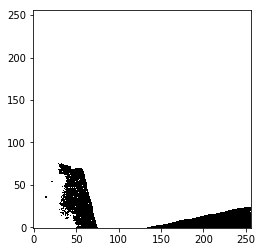

In [36]:
gt_mask_img = nib.load(gt_mask).get_data()
show_slice(gt_mask_img)


DescribeResult(nobs=65536, minmax=(0.0, 1.0), mean=0.8999939, variance=0.09000624, skewness=-2.6665542125701904, kurtosis=5.110511600891456)

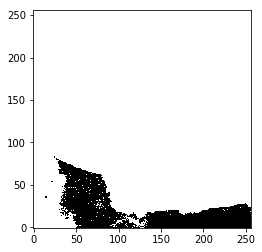

In [39]:
# Visualize masks
pred_mask_img =nib.load(pred_mask).get_data()
pred_mask_img[pred_mask_img >= 0.5] = 1.0
pred_mask_img[pred_mask_img < 0.5] = 0.0
show_slice(pred_mask_img[:, :, 0])
stats.describe(pred_mask_img[:,:,0].flatten())